# 라이브러리 선언

In [536]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import PIL
import pathlib

import keras
from keras.layers import *
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# 데이터 가져오기

In [537]:
data_dir= os.path.join('C:/Users/duddm/Code/Neural Networks/project_final/Garbage classification')
data_dir = pathlib.Path(data_dir)

# 데이터 탐색

In [538]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2527


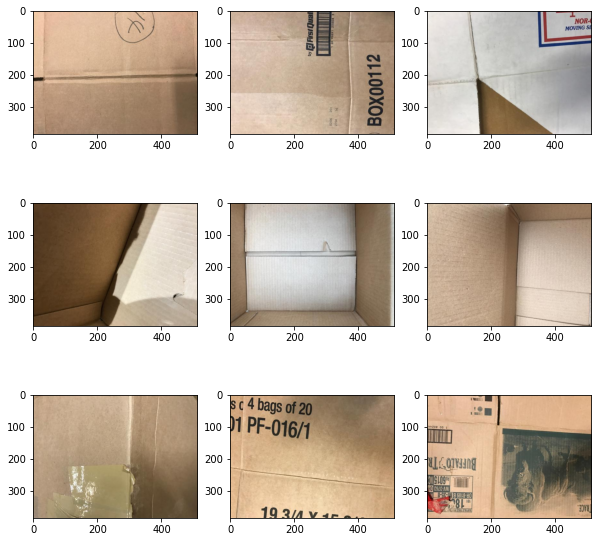

In [539]:
cardboard = list(data_dir.glob('cardboard/*'))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(str(cardboard[i])))

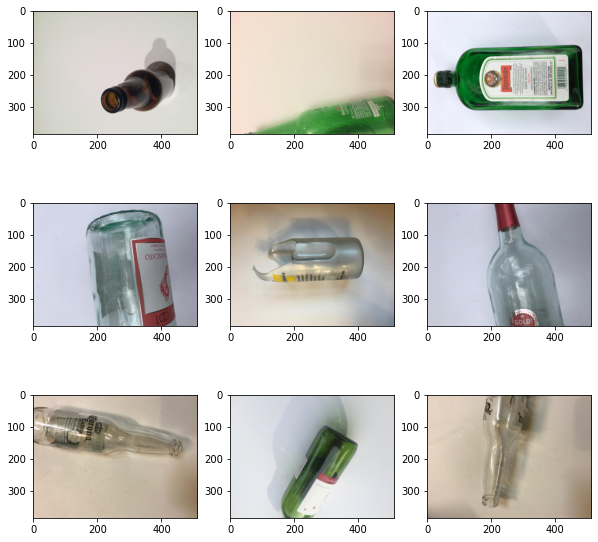

In [540]:
cardboard = list(data_dir.glob('glass/*'))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(str(cardboard[i])))

# 데이터 전처리

모델을 훈련하기 전, Overfitting 방지를 위해 data augmentation 진행 후
train dataset 과 test dataset으로 나누어 준비

In [541]:
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         zoom_range = 0.1,
                         shear_range=0.1,
                         width_shift_range= 0.1,
                         height_shift_range = 0.1,)
test=ImageDataGenerator(rescale=1/255,validation_split=0.1)
train_generator=train.flow_from_directory(data_dir,target_size=(300,300),batch_size=32,
                                          class_mode='categorical',subset='training')
test_generator=test.flow_from_directory(data_dir,target_size=(300,300),batch_size=32,
                                        class_mode='categorical',subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [542]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [543]:
X_train,Y_train = train_generator.next()
print(len(X_train), len(Y_train), X_train.shape)

32 32 (32, 300, 300, 3)


# 데이터시각화

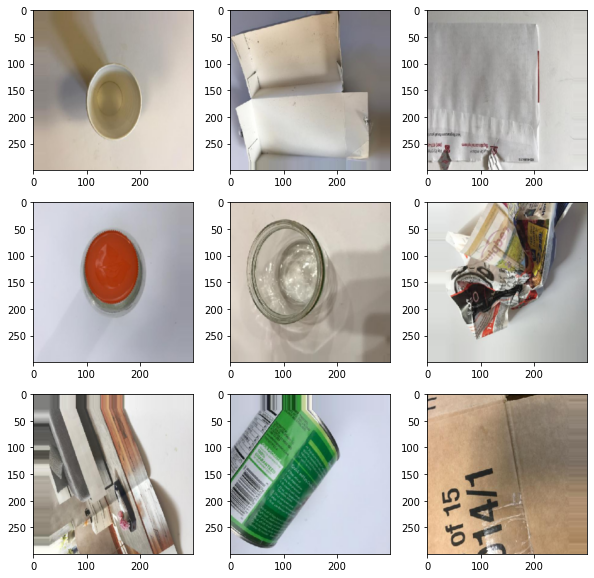

In [544]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])

# 모델 생성

In [545]:
num_classes = 6

model=Sequential()
    
model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

# 모델 컴파일

In [546]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약

In [547]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 37, 37, 32)      

In [548]:
hist = model.fit_generator(train_generator, epochs=20,validation_data=test_generator)

Epoch 1/20
72/72 [==============================] - 389s 5s/step - loss: 1.7016 - accuracy: 0.2457 - val_loss: 1.4919 - val_accuracy: 0.3745
Epoch 2/20
72/72 [==============================] - 349s 5s/step - loss: 1.4879 - accuracy: 0.3757 - val_loss: 1.3802 - val_accuracy: 0.4143
Epoch 3/20
72/72 [==============================] - 358s 5s/step - loss: 1.3458 - accuracy: 0.4591 - val_loss: 1.3549 - val_accuracy: 0.4143
Epoch 4/20
72/72 [==============================] - 333s 5s/step - loss: 1.3078 - accuracy: 0.4623 - val_loss: 1.2876 - val_accuracy: 0.4422
Epoch 5/20
72/72 [==============================] - 329s 5s/step - loss: 1.2589 - accuracy: 0.5048 - val_loss: 1.2464 - val_accuracy: 0.4940
Epoch 6/20
72/72 [==============================] - 332s 5s/step - loss: 1.2030 - accuracy: 0.5172 - val_loss: 1.2291 - val_accuracy: 0.5139
Epoch 7/20
72/72 [==============================] - 339s 5s/step - loss: 1.1958 - accuracy: 0.5366 - val_loss: 1.2226 - val_accuracy: 0.5339
Epoch 8/20
72

# 정확도 평가

In [549]:
print("훈련 정확도 : ",hist.history['accuracy'][19])
print("테스트 정확도 : ",hist.history['val_accuracy'][19])

훈련 정확도 :  0.695518434047699
테스트 정확도 :  0.6613546013832092


# 훈련 결과 시각화

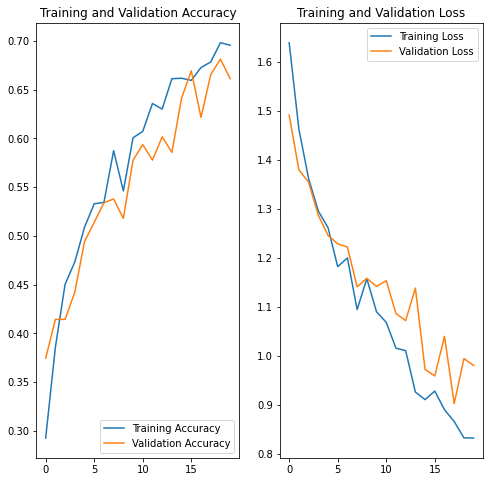

In [550]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = 20

loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 예측하기

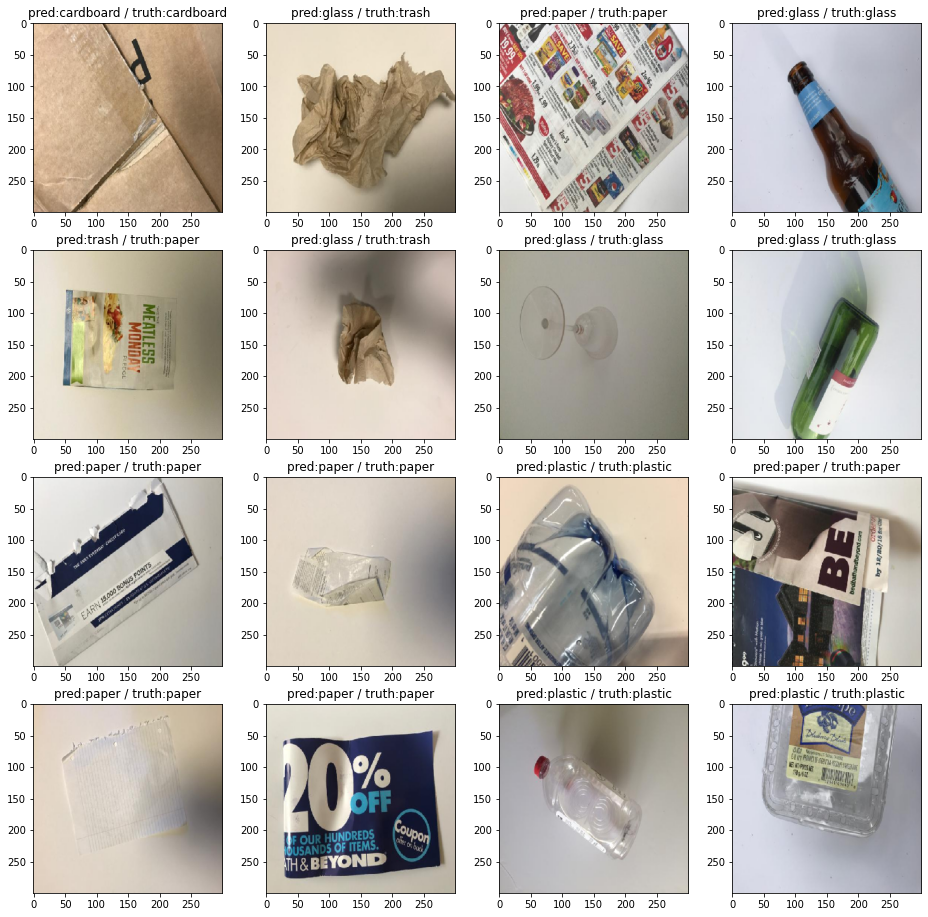

In [551]:
test_x, test_y = test_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

예측 확률:  0.9829349
예측 label: plastic


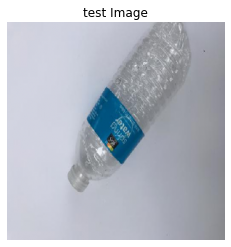

In [552]:
from keras.preprocessing import image

img_path = 'C:/Users/duddm/Code/Neural Networks/project_final/Garbage classification/plastic/plastic75.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("test Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("예측 확률: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("예측 label:",predicted_class)


CARDBOARD : 0.13 %
GLASS : 1.43 %
METAL : 0.13 %
PAPER : 0.0 %
PLASTIC : 98.29 %
TRASH : 0.01 %


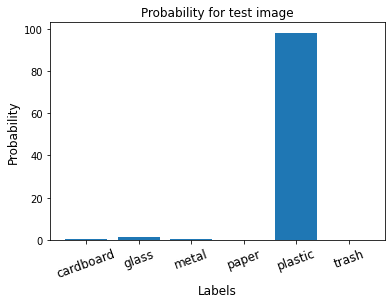

In [553]:
classes=[]
prob=[]

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for test image')
    plt.show()
plot_bar_x()